<a href="https://colab.research.google.com/github/maddy1096/CryptocurrencyPredictionAndAnalysis/blob/main/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extract real time data from cryptocompare API

In [ ]:
import requests
import json
import pandas as pd
import datetime
import csv

def coin_info(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/generateAvg?fsym={}&tsym={}&e=Kraken' \
            .format(symbol.upper(), comparison_symbol.upper())
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()
    m = data['RAW']
    return m


l = []
x = ['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC']
for i in x:
  m = coin_info(i,'USD')
  l.append(m.copy())

ff = pd.DataFrame(l)
ff.to_csv('data_all.csv',index = False)
print('Dataset has been created')

Dataset has been created


Creating bargraphs 

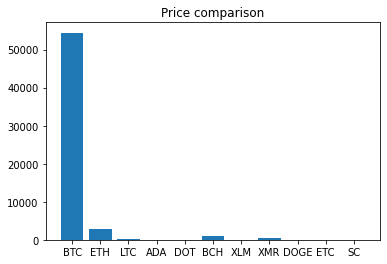

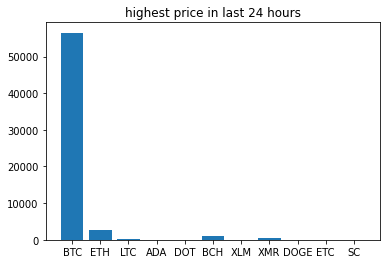

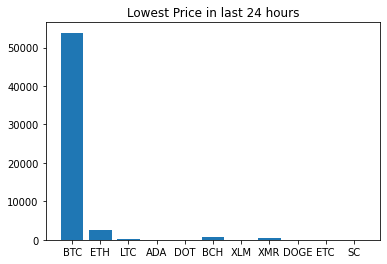

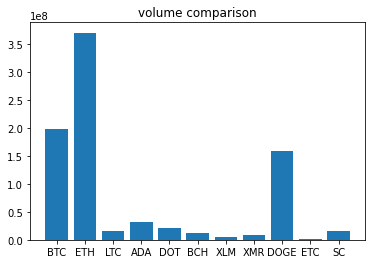

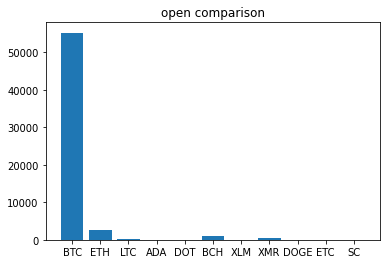

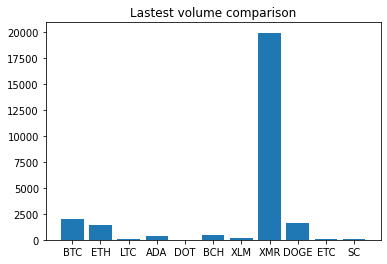

In [ ]:
df = pd.read_csv('data_all.csv')

#create graph for price of coins
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = df['PRICE'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("Price comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = df['HIGH24HOUR'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))
plt.title("highest price in last 24 hours")
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# Make a random dataset:
height = df['LOW24HOUR'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("Lowest Price in last 24 hours")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# Make a random dataset:
height = df['VOLUME24HOURTO'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("volume comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

height = df['OPEN24HOUR'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("open comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

height = df['LASTVOLUMETO'].tolist()
bars = (['BTC','ETH','LTC','ADA','DOT','BCH','XLM','XMR','DOGE','ETC','SC'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
plt.title("Lastest volume comparison")
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Creating scatter plots

Dataset of BTC has been created
Dataset of ETH has been created


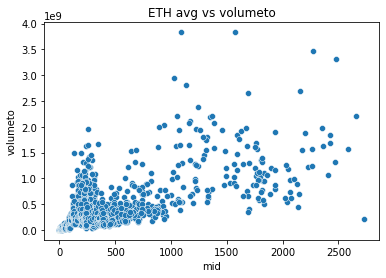

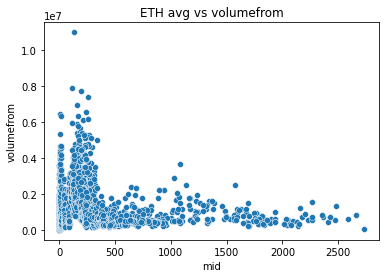

In [ ]:
import requests
import json
import pandas as pd
import datetime
import csv
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
  
    return df

x = ['BTC','ETH']
for i in x:
  m = daily_price_historical(i,'USD')
  m['Symbol'] = i
  m.to_csv("./{0}_price.csv".format(i.replace("-","_")),index = False)

  print('Dataset of '+i+' has been created')

  # libraries
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ETH_price.csv')

high = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
df['mid'] = mid_prices

# data

sns.scatterplot(data=df, x="mid", y="volumeto", legend=False, sizes=(20, 2000))

# show the graph
plt.title('ETH avg vs volumeto')
plt.show()

sns.scatterplot(data=df, x="mid", y="volumefrom", legend=False, sizes=(20, 2000))
plt.title('ETH avg vs volumefrom')
plt.show()

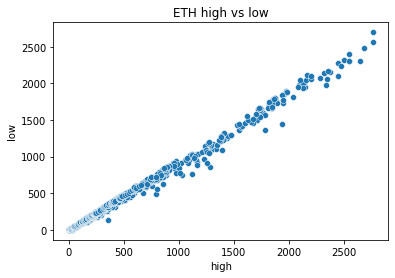

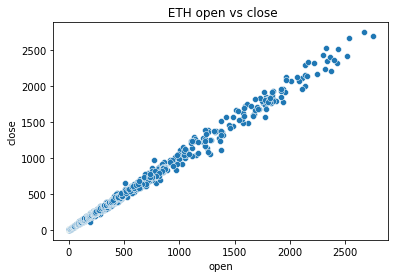

In [ ]:
sns.scatterplot(data=df, x="high", y="low", legend=False, sizes=(20, 2000))
plt.title('ETH high vs low')
plt.show()

sns.scatterplot(data=df, x="open", y="close", legend=False, sizes=(20, 2000))
plt.title(' ETH open vs close')
plt.show()

Creating graphs to compate historical volumes and prices of bitcoins and ethereum

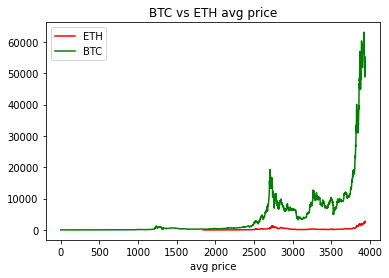

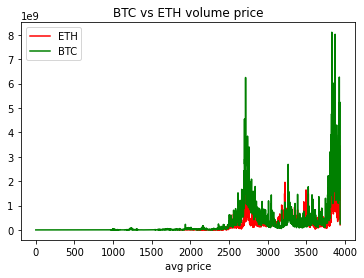

In [ ]:
df1 = pd.read_csv('ETH_price.csv')
df2 =  pd.read_csv('BTC_price.csv')

dfs = []
for m in x:
  filenames = '{}_price.csv'.replace('{}',m)
  df = pd.read_csv(filenames)
  #Drop all zeroes
  df1 = df1[(df['high']!=0)]
  dfs.append(df)


high = df1.loc[:,'high'].to_numpy()
low_prices = df1.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
df1['mid'] = mid_prices

high = df2.loc[:,'high'].to_numpy()
low_prices = df2.loc[:,'low'].to_numpy()
mid_prices = (high+low_prices)/2.0
df2['mid'] = mid_prices

plt.plot(df1['mid'], color = 'red',label = 'ETH')
plt.plot(df2['mid'],color = 'green',label = 'BTC')
plt.xlabel('avg price')
plt.title('BTC vs ETH avg price')
plt.legend()
plt.show()

plt.plot(df1['volumeto'], color = 'red',label = 'ETH')
plt.plot(df2['volumeto'],color = 'green',label = 'BTC')
plt.xlabel('avg price')
plt.title('BTC vs ETH volume price')
plt.legend()
plt.show()

